# Attrition Model building

In [2]:
# pip list

In [119]:
pip install scikit-learn==1.2.2

Note: you may need to restart the kernel to use updated packages.Collecting scikit-learn==1.2.2

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.0
    Uninstalling scikit-learn-1.4.0:
      Successfully uninstalled scikit-learn-1.4.0


In [116]:
!pip install --upgrade joblib

In [3]:
# Import library to read the dataset
import pandas as pd
import numpy as np

# Import library to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# to calculate the computing speed of the model
from time import time

# View all the columns of the dataset
pd.set_option('display.max_columns', None)

In [4]:
# Reading the dataset
data = pd.read_csv('attr.csv')
data.sample(5)

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1245,1246,24,No,Travel_Frequently,897,Human Resources,10,3,Medical,1,1746,1,Male,59,3,1,Human Resources,4,Married,2145,2097,0,Y,No,14,3,4,80,1,3,2,3,2,2,2,1
700,701,58,Yes,Travel_Rarely,289,Research & Development,2,3,Technical Degree,1,977,4,Male,51,3,1,Research Scientist,3,Single,2479,26227,4,Y,No,24,4,1,80,0,7,4,3,1,0,0,0
1256,1257,38,No,Travel_Frequently,594,Research & Development,2,2,Medical,1,1760,3,Female,75,2,1,Laboratory Technician,2,Married,2468,15963,4,Y,No,14,3,2,80,1,9,4,2,6,1,0,5
493,494,44,No,Travel_Rarely,1112,Human Resources,1,4,Life Sciences,1,665,1,Female,50,2,2,Human Resources,3,Single,5985,26894,4,Y,No,11,3,2,80,0,10,1,4,2,2,0,2
1340,1341,36,No,Travel_Rarely,1266,Sales,10,4,Technical Degree,1,1880,2,Female,63,2,2,Sales Executive,3,Married,5673,6060,1,Y,Yes,13,3,1,80,1,10,4,3,10,9,1,7


In [5]:
# Understanding the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [6]:
# Further understanding the data
data.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Encoding categorical values
Mapping the categorical variables.

In [7]:
# BusinessTravel

# 0 - Travel_Rarely
# 1 - Travel_Frequently
# 2 - Non-Travel
print(f"Unique Values pre-mapping:\n{data.BusinessTravel.unique()}\n")
data['BusinessTravel'] = data['BusinessTravel'].map({'Travel_Rarely' : 0,
                                                     'Travel_Frequently' : 1,
                                                     'Non-Travel' : 2}).astype('int64')
print(f"Unique Values post-mapping:\n{data.BusinessTravel.unique()}")

Unique Values pre-mapping:
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Unique Values post-mapping:
[0 1 2]


In [8]:
# Department

# 0 - Sales
# 1 - Reasearch & Development
# 2 - Human Resources
print(f"Unique Values pre-mapping:\n{data.Department.unique()}\n")
data['Department'] = data['Department'].map({'Sales' : 0,
                                             'Research & Development' : 1,
                                             'Human Resources' : 2}).astype('int64')
print(f"Unique Values post-mapping:\n{data.Department.unique()}")

Unique Values pre-mapping:
['Sales' 'Research & Development' 'Human Resources']

Unique Values post-mapping:
[0 1 2]


In [9]:
# EducationField

# 0 - Life Sciences
# 1 - Medical
# 2 - Marketing
# 3 - Technical Degree
# 4 - Human Resources
# 5 - Others
print(f"unique values pre-mapping:\n{data.EducationField.unique()}\n")
data['EducationField'] = data['EducationField'].map({'Life Sciences' : 0,
                                                     'Medical' : 1,
                                                     'Marketing' : 2,
                                                     'Technical Degree' : 3,
                                                     'Human Resources' : 4,
                                                     'Other' : 5}).astype('int64')
print(f"unique values post-mapping:\n{data.EducationField.unique()}")

unique values pre-mapping:
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

unique values post-mapping:
[0 5 1 2 3 4]


In [10]:
# Gender

# 0 - Male
# 1 - Female
print(f"Unique values pre-mapping:\n{data.Gender.unique()}\n")
data['Gender'] = data['Gender'].map({'Male' : 0,
                                     'Female' : 1}).astype('int64')
print(f"Unique values post-mapping:\n{data.Gender.unique()}")

Unique values pre-mapping:
['Female' 'Male']

Unique values post-mapping:
[1 0]


In [11]:
# OverTime

# 0 - No
# 1 - Yes
print(f"Unique values pre-mapping:\n{data.OverTime.unique()}\n")
data['OverTime'] = data['OverTime'].map({'No' : 0,
                                         'Yes' : 1}).astype('int64')
print(f"Unique values post-mapping:\n{data.OverTime.unique()}")

Unique values pre-mapping:
['Yes' 'No']

Unique values post-mapping:
[1 0]


In [12]:
# Attrition

# 0 - No
# 1 - Yes
print(f"Unique values pre-mapping:\n{data.Attrition.unique()}\n")
data['Attrition'] = data['Attrition'].map({'No' : 0,
                                         'Yes' : 1}).astype('int64')
print(f"Unique values post-mapping:\n{data.Attrition.unique()}")

Unique values pre-mapping:
['Yes' 'No']

Unique values post-mapping:
[1 0]


In [13]:
# MaritalStatus

# 0 - Single
# 1 - Married
# 2 - Divorced
data.MaritalStatus.unique()
print(f"Unique values pre-mapping:\n{data.MaritalStatus.unique()}\n")
data['MaritalStatus'] = data['MaritalStatus'].map({'Single' : 0,
                                                   'Married' : 1,
                                                   'Divorced' : 2}).astype('int64')
print(f"Unique values post-mapping:\n{data.MaritalStatus.unique()}")

Unique values pre-mapping:
['Single' 'Married' 'Divorced']

Unique values post-mapping:
[0 1 2]


In [14]:
# JobRole

# 0 - Sales Executive
# 1 - Research Scientist
# 2 - Laboratory Technician
# 3 - Manufacturing Director
# 4 - Healthcare Representative
# 5 - Manager
# 6 - Sales Representative
# 7 - Research Director
# 8 - Human Resources
data.JobRole.unique()
print(f"Unique values pre-mapping:\n{data.JobRole.unique()}\n")
data['JobRole'] = data['JobRole'].map({'Sales Executive' : 0,
                                       'Research Scientist' : 1,
                                       'Laboratory Technician' : 2,
                                       'Manufacturing Director' : 3,
                                       'Healthcare Representative' : 4,
                                       'Manager' : 5,
                                       'Sales Representative' : 6,
                                       'Research Director' : 7,
                                       'Human Resources' : 8}).astype('int64')
print(f"Unique values post-mapping:\n{data.JobRole.unique()}")

Unique values pre-mapping:
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

Unique values post-mapping:
[0 1 2 3 4 5 6 7 8]


In [42]:
data_ml = data[['EmployeeNumber', 'Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
            'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
            'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
            'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
            'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
            'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
data_ml.to_csv('ml_attr.csv', index=False)

In [41]:
# data_ml

# ooo

In [16]:
# from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


X = data.drop(['id', 'Attrition', 'EmployeeCount','EmployeeNumber', 'Over18'], axis = 1) # Features
# X = StandardScaler().fit_transform(X.astype(float))
y = data.Attrition # Target

# X.head(5)

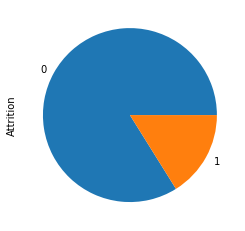

In [17]:
attr = y.value_counts()
attr.plot(kind='pie')
plt.show()

In [18]:
Counter(y_smote)

NameError: name 'y_smote' is not defined

In [35]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,1102,0,1,2,0,2,1,94,3,2,0,4,0,5993,19479,8,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,0,3,0,61,2,2,1,2,1,5130,24907,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,0,1373,1,2,2,5,4,0,92,2,1,2,3,0,2090,2396,6,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,0,4,1,56,3,1,1,3,1,2909,23159,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,591,1,2,1,1,1,0,40,3,1,2,2,1,3468,16632,9,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,1,3,0,41,4,2,2,4,1,2571,12290,4,0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,613,1,6,1,1,4,0,42,2,3,4,1,1,9991,21457,4,0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,155,1,4,3,0,2,0,87,4,2,3,2,1,6142,5174,1,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,1,1023,0,2,3,1,4,0,63,2,2,0,2,1,5390,13243,2,0,14,3,4,80,0,17,3,2,9,6,0,8


The class is highly unbalanced so we will be employing an oversampling technique called SMOTE to balance the dataset

In [19]:
# ROS oversamping Technique
ROS = RandomOverSampler()
x_ROS, y_ROS = ROS.fit_resample(X, y)

In [20]:
# Splitting the data into train and test 
# train_x, test_x, train_y, test_y = train_test_split(x_ROS, y_ROS, test_size=0.2)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [21]:
# initialize empty dictionaries to store the speed and accuracy of the models used.
speed = {}
accuracy = {}

In [22]:
# XGBClassifier
from xgboost import XGBClassifier
xgb = XGBClassifier()

start = time()

xgb.fit(train_x, train_y)
xgb_pred = xgb.predict(test_x)

speed['XGBClassifier'] = np.round(time() - start, 3)
accuracy['XGBClassifier'] = np.round(f1_score(test_y, xgb_pred) * 100, 3)

In [23]:
# LGBMClassifier
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()


start = time()

lgbm.fit(train_x, train_y)
lgbm_pred = lgbm.predict(test_x)

speed['LGBMClassifier'] = np.round(time() - start, 3)
accuracy['LGBMClassifier'] = np.round(f1_score(test_y, lgbm_pred) * 100, 3)

In [24]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
adaBoost = AdaBoostClassifier()

start = time()

adaBoost.fit(train_x, train_y)
adaBoost_pred = adaBoost.predict(test_x)

speed['AdaBoostClassifier'] = np.round(time() - start, 3)
accuracy['AdaBoostClassifier'] = np.round(f1_score(test_y, adaBoost_pred) * 100, 3)

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

start = time()

rfc.fit(train_x, train_y)
rfc_pred = rfc.predict(test_x)

speed['RandomForestClassifier'] = np.round(time() - start, 3)
accuracy['RandomForestClassifier'] = np.round(f1_score(test_y, rfc_pred) * 100, 3)

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()

start = time()

dtc.fit(train_x, train_y)
dtc_pred = dtc.predict(test_x)

speed['DecisionTreeClassifier'] = np.round(time() - start, 3)
accuracy['DecisionTreeClassifier'] = np.round(f1_score(test_y, dtc_pred) * 100, 3)

In [27]:
# RECHECK!!!!!!!!!!!!!!!!
for algo, result in accuracy.items():
    print(f"{algo:{24}} Score: {result}, Speed: {speed[algo]} seconds")

XGBClassifier            Score: 34.667, Speed: 0.416 seconds
LGBMClassifier           Score: 39.474, Speed: 0.393 seconds
AdaBoostClassifier       Score: 42.5, Speed: 0.42 seconds
RandomForestClassifier   Score: 25.0, Speed: 0.388 seconds
DecisionTreeClassifier   Score: 33.01, Speed: 0.025 seconds


In [28]:
# Creating a dataframe for each of the dictionaries
accuracy_df = pd.DataFrame(list(accuracy.items()), columns=['Algorithm', 'Accuracy'])
speed_df = pd.DataFrame(list(speed.items()), columns=['Algorithm', 'Time'])

In [29]:
accuracy_df

,Algorithm,Accuracy
0,XGBClassifier,34.667
1,LGBMClassifier,39.474
2,AdaBoostClassifier,42.500
3,RandomForestClassifier,25.000
4,DecisionTreeClassifier,33.010


In [30]:
# Saving the model
import joblib

model_filename = 'attr_model_class.joblib'
joblib.dump(rfc, model_filename)

['attr_model_class.joblib']

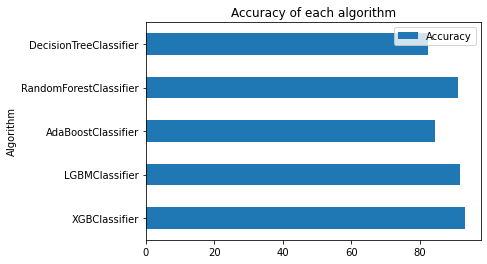

In [29]:
accuracy_df.plot(kind='barh', x='Algorithm', y='Accuracy')
plt.title("Accuracy of each algorithm");

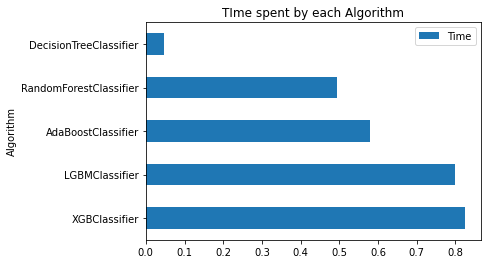

In [30]:
speed_df.plot(kind='barh', x='Algorithm', y='Time')
plt.title("TIme spent by each Algorithm");

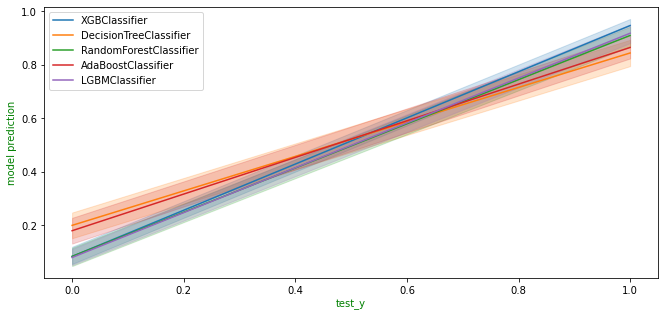

In [31]:
# Plotting model performance
fig, ax = plt.subplots(figsize=(11, 5))
 
ax = sns.lineplot(x=test_y, y=xgb_pred,
                  label='XGBClassifier')
ax1 = sns.lineplot(x=test_y, y=dtc_pred,
                   label='DecisionTreeClassifier')
ax2 = sns.lineplot(x=test_y, y=rfc_pred,
                   label='RandomForestClassifier')
ax3 = sns.lineplot(x=test_y, y=adaBoost_pred,
                   label='AdaBoostClassifier')
ax4 = sns.lineplot(x=test_y, y=lgbm_pred,
                   label='LGBMClassifier')
 
ax.set_xlabel('test_y', color='g')
ax.set_ylabel('model prediction', color='g');